In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Phishing/UNB/Binary/Base_classifier_result(HTML cross).csv")
data

,labels,dt_prediction_non,dt_prediction_phish,knn_prediction_non,knn_prediction_phish,XGB_prediction_non,XGB_prediction_phish
0,1,0.955923,0.044077,0.714286,0.285714,0.760456,0.239544
1,0,0.993976,0.006024,1.000000,0.000000,0.991305,0.008695
2,0,0.993976,0.006024,1.000000,0.000000,0.925598,0.074402
3,0,0.993976,0.006024,1.000000,0.000000,0.994100,0.005900
4,0,0.993976,0.006024,1.000000,0.000000,0.991305,0.008695
...,...,...,...,...,...,...,...
2933,1,0.027523,0.972477,0.000000,1.000000,0.093861,0.906139
2934,0,0.955923,0.044077,1.000000,0.000000,0.953950,0.046050
2935,0,0.970149,0.029851,1.000000,0.000000,0.995173,0.004827
2936,0,0.970149,0.029851,1.000000,0.000000,0.991433,0.008567


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   labels                2938 non-null   int64  
 1   dt_prediction_non     2938 non-null   float64
 2   dt_prediction_phish   2938 non-null   float64
 3   knn_prediction_non    2938 non-null   float64
 4   knn_prediction_phish  2938 non-null   float64
 5   XGB_prediction_non    2938 non-null   float64
 6   XGB_prediction_phish  2938 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 160.8 KB


In [5]:
import numpy as np


y = data['labels'].values
x = np.array(data.drop('labels',axis=1))


print(x.shape, y.shape)

(2938, 6) (2938,)


In [8]:

import keras
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def model_aa(x_train, x_val, y_train, y_val, opt, early_stopping_monitor):

  n_cols = x_train.shape[1]
  #create model
  model = Sequential()
  model.add(Dense(5, input_dim=6, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  
  #compile model using mse as a measure of model performance
  model.compile(optimizer = opt, loss= 'binary_crossentropy', metrics=["accuracy"])

  history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), callbacks=[early_stopping_monitor])


  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
  plt.show()


  print('Validation Accuracy: ')
  # Predicting the Test set results
  y_pred = model.predict(x_val)
  y_pred = (y_pred > 0.5)


  print(classification_report(y_val, y_pred))

  # Model Accuracy, how often is the classifier correct?
  print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

  # Creating the Confusion Matrix
  cm = confusion_matrix(y_val, y_pred)
  cm
  tn, fp, fn, tp = confusion_matrix(list(y_val), list(y_pred), labels=[0, 1]).ravel()

  print('True Positive', tp)
  print('True Negative', tn)
  print('False Positive', fp)
  print('False Negative', fn)

  print('Precision: %.4f' % precision_score(y_val, y_pred))
  print('Recall: %.4f' % recall_score(y_val, y_pred))
  print('F1 Score: %.4f' % f1_score(y_val, y_pred))

  return metrics.accuracy_score(y_val, y_pred)



Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.9493 - accuracy: 0.0972 - val_loss: 0.8280 - val_accuracy: 0.1701
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.7474 - accuracy: 0.3491 - val_loss: 0.6814 - val_accuracy: 0.7517
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.6284 - accuracy: 0.7613 - val_loss: 0.5896 - val_accuracy: 0.7517
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5499 - accuracy: 0.7610 - val_loss: 0.5278 - val_accuracy: 0.7517
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4931 - accuracy: 0.7610 - val_loss: 0.4796 - val_accuracy: 0.7517
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4486 - accuracy: 0.7610 - val_loss: 0.4418 - val_accuracy: 0.7517
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4149 - accuracy: 0.7610 - val_loss: 0.4156 - val_accuracy: 0.7517
Epoch 8/100
8

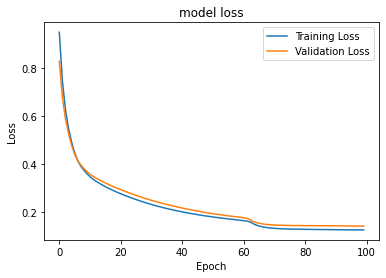

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       221
           1       0.89      0.88      0.88        73

    accuracy                           0.94       294
   macro avg       0.92      0.92      0.92       294
weighted avg       0.94      0.94      0.94       294

Accuracy: 0.9421768707482994
True Positive 64
True Negative 213
False Positive 8
False Negative 9
Precision: 0.8889
Recall: 0.8767
F1 Score: 0.8828
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.4153 - accuracy: 0.7659 - val_loss: 0.3239 - val_accuracy: 0.8367
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2900 - accuracy: 0.9036 - val_loss: 0.2408 - val_accuracy: 0.9388
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2315 - accuracy: 0.9323 - val_loss: 0.1972 - val_accuracy: 0.9490
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1984 

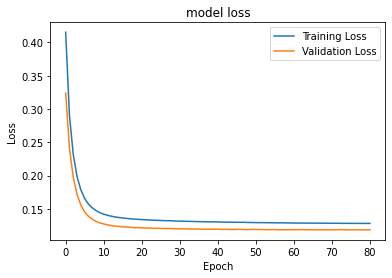

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       224
           1       0.89      0.93      0.91        70

    accuracy                           0.96       294
   macro avg       0.93      0.95      0.94       294
weighted avg       0.96      0.96      0.96       294

Accuracy: 0.95578231292517
True Positive 65
True Negative 216
False Positive 8
False Negative 5
Precision: 0.8904
Recall: 0.9286
F1 Score: 0.9091
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.3845 - accuracy: 0.7984 - val_loss: 0.2902 - val_accuracy: 0.9116
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2444 - accuracy: 0.9251 - val_loss: 0.2102 - val_accuracy: 0.9354
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1923 - accuracy: 0.9399 - val_loss: 0.1771 - val_accuracy: 0.9422
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1694 - 

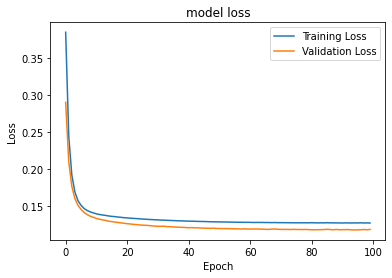

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       221
           1       0.96      0.89      0.92        73

    accuracy                           0.96       294
   macro avg       0.96      0.94      0.95       294
weighted avg       0.96      0.96      0.96       294

Accuracy: 0.9625850340136054
True Positive 65
True Negative 218
False Positive 3
False Negative 8
Precision: 0.9559
Recall: 0.8904
F1 Score: 0.9220
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.7846 - accuracy: 0.3116 - val_loss: 0.6406 - val_accuracy: 0.7823
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5754 - accuracy: 0.7640 - val_loss: 0.5083 - val_accuracy: 0.8299
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4637 - accuracy: 0.8714 - val_loss: 0.4085 - val_accuracy: 0.9184
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3756 

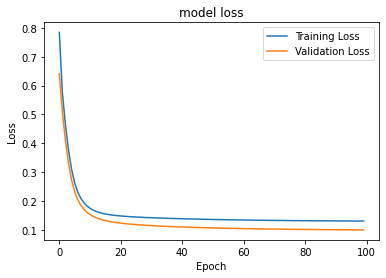

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       225
           1       0.97      0.88      0.92        69

    accuracy                           0.97       294
   macro avg       0.97      0.94      0.95       294
weighted avg       0.97      0.97      0.97       294

Accuracy: 0.9659863945578231
True Positive 61
True Negative 223
False Positive 2
False Negative 8
Precision: 0.9683
Recall: 0.8841
F1 Score: 0.9242
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.5690 - accuracy: 0.9228 - val_loss: 0.4717 - val_accuracy: 0.9354
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4013 - accuracy: 0.9406 - val_loss: 0.3525 - val_accuracy: 0.9354
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3084 - accuracy: 0.9425 - val_loss: 0.2881 - val_accuracy: 0.9354
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2562 

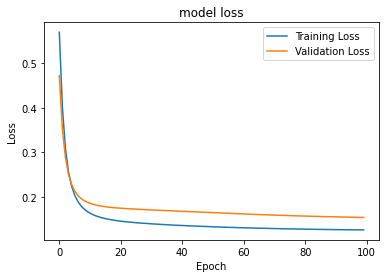

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       223
           1       0.90      0.86      0.88        71

    accuracy                           0.94       294
   macro avg       0.93      0.91      0.92       294
weighted avg       0.94      0.94      0.94       294

Accuracy: 0.9421768707482994
True Positive 61
True Negative 216
False Positive 7
False Negative 10
Precision: 0.8971
Recall: 0.8592
F1 Score: 0.8777
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.5139 - accuracy: 0.8627 - val_loss: 0.3836 - val_accuracy: 0.9388
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3203 - accuracy: 0.9410 - val_loss: 0.2879 - val_accuracy: 0.9388
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2520 - accuracy: 0.9425 - val_loss: 0.2403 - val_accuracy: 0.9388
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2157

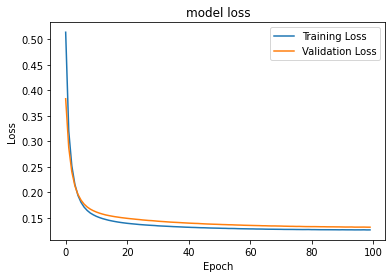

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       215
           1       0.89      0.94      0.91        79

    accuracy                           0.95       294
   macro avg       0.93      0.95      0.94       294
weighted avg       0.95      0.95      0.95       294

Accuracy: 0.9523809523809523
True Positive 74
True Negative 206
False Positive 9
False Negative 5
Precision: 0.8916
Recall: 0.9367
F1 Score: 0.9136
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.5622 - accuracy: 0.8510 - val_loss: 0.4508 - val_accuracy: 0.9456
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3786 - accuracy: 0.9478 - val_loss: 0.3237 - val_accuracy: 0.9388
Epoch 3/100
83/83 [==============================] - 0s 3ms/step - loss: 0.2817 - accuracy: 0.9546 - val_loss: 0.2554 - val_accuracy: 0.9354
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2285 

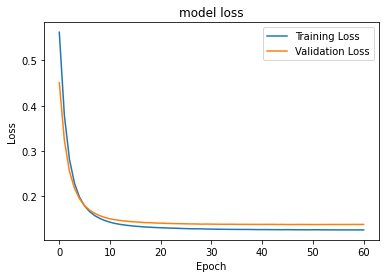

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       219
           1       0.92      0.91      0.91        75

    accuracy                           0.96       294
   macro avg       0.94      0.94      0.94       294
weighted avg       0.96      0.96      0.96       294

Accuracy: 0.95578231292517
True Positive 68
True Negative 213
False Positive 6
False Negative 7
Precision: 0.9189
Recall: 0.9067
F1 Score: 0.9128
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.4946 - accuracy: 0.8109 - val_loss: 0.3789 - val_accuracy: 0.9116
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3074 - accuracy: 0.9312 - val_loss: 0.2738 - val_accuracy: 0.9388
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2342 - accuracy: 0.9402 - val_loss: 0.2293 - val_accuracy: 0.9456
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1998 - 

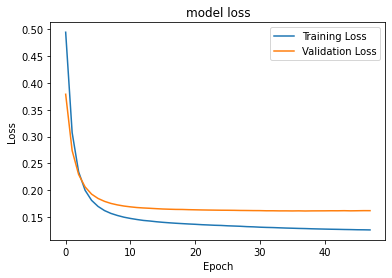

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       223
           1       0.95      0.85      0.90        71

    accuracy                           0.95       294
   macro avg       0.95      0.92      0.93       294
weighted avg       0.95      0.95      0.95       294

Accuracy: 0.9523809523809523
True Positive 60
True Negative 220
False Positive 3
False Negative 11
Precision: 0.9524
Recall: 0.8451
F1 Score: 0.8955
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.4730 - accuracy: 0.9093 - val_loss: 0.3508 - val_accuracy: 0.9420
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3271 - accuracy: 0.9331 - val_loss: 0.2601 - val_accuracy: 0.9488
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2603 - accuracy: 0.9391 - val_loss: 0.2095 - val_accuracy: 0.9522
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2201

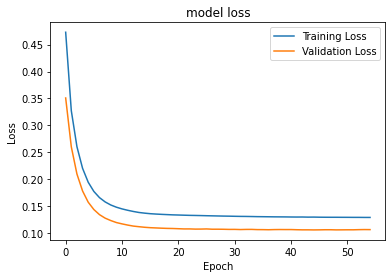

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       235
           1       0.87      0.93      0.90        58

    accuracy                           0.96       293
   macro avg       0.93      0.95      0.94       293
weighted avg       0.96      0.96      0.96       293

Accuracy: 0.9590443686006825
True Positive 54
True Negative 227
False Positive 8
False Negative 4
Precision: 0.8710
Recall: 0.9310
F1 Score: 0.9000
Epoch 1/100
83/83 [==============================] - 1s 8ms/step - loss: 0.3956 - accuracy: 0.9376 - val_loss: 0.2673 - val_accuracy: 0.9420
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2361 - accuracy: 0.9422 - val_loss: 0.2023 - val_accuracy: 0.9420
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1932 - accuracy: 0.9440 - val_loss: 0.1761 - val_accuracy: 0.9454
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1732 

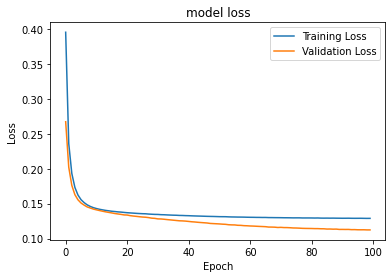

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       227
           1       0.92      0.89      0.91        66

    accuracy                           0.96       293
   macro avg       0.95      0.94      0.94       293
weighted avg       0.96      0.96      0.96       293

Accuracy: 0.9590443686006825
True Positive 59
True Negative 222
False Positive 5
False Negative 7
Precision: 0.9219
Recall: 0.8939
F1 Score: 0.9077
Average Validation Accuracy: 0.9547340437881638


In [9]:
from sklearn.model_selection import KFold
import tensorflow as tf

optimizer1=tf.keras.optimizers.Adam(learning_rate=0.0005)


from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)
n_split = 10
acc = 0

kf = KFold(n_split, random_state=10, shuffle=True)
for train, val in kf.split(x, y):
  val_acc = model_aa(x[train], x[val], y[train], y[val], optimizer1, early_stopping_monitor)
  acc = acc + val_acc

print("Average Validation Accuracy:",acc/n_split)

